In [1]:
import psutil, os
import gc
import time
import importlib
import chebychev
import lanczos
import numpy as np
import scipy.sparse as sp
from scipy.sparse import linalg as linal
import torch
import matplotlib.pyplot as plt

process = psutil.Process(os.getpid())
print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")
#importlib.reload(chebychev)


Memory: 475.25 MB


In [2]:
operator_full= chebychev.operator_full

Memory: 906.99 MB


/home/n/N.Deshpande/my_folder/thesis/chebychev exp/chebychev.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
  A[i] = np.dot(g * mu, tn_omega)


Memory: 915.52 MB
time= -19.473798990249634
Memory: 915.52 MB
Memory: 915.69 MB
time= -16.584401845932007
Memory: 915.69 MB
Memory: 915.91 MB
time= -22.7633056640625
Memory: 915.91 MB
Memory: 916.29 MB
time= -26.62978744506836
Memory: 916.29 MB
Memory: 916.40 MB
time= -36.88908410072327
Memory: 916.40 MB


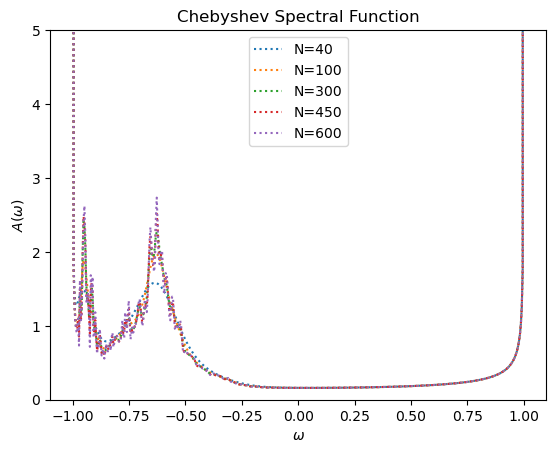

Memory: 919.35 MB


In [3]:
L =18
g=0.1
j =1
sx_list = lanczos.gen_sx_list(L)
sz_list = lanczos.gen_sz_list(L)
sy_list = lanczos.gen_sy_list(L)
H1 = lanczos.gen_hamiltonian_heisenberg(sx_list,sz_list,sy_list,g,j,pbc =True)
#H2 = lanczos.gen_hamiltonian(sx_list,sz_list,g,j,pbc =True)
O2 = operator_full(lanczos.Sx,L)
#O1 = lanczos.singlesite_to_full(lanczos.Sz,5,L) +lanczos.singlesite_to_full(lanczos.Sz,6,L)   

psi01 = sp.lil_matrix((2**L,1), dtype=np.complex128)
psi01[500,0] = 1.0

#psi0_haar = chebychev.haar_stat(L,complex_entry=False)
# psi01 = np.zeros(2**L)
# psi01[500]=1
#psi0 = haar_stat(L,complex_entry=True)

print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")


N = [40,100,300,450,600]
for n in N:
    t0 = time.time()
    mu = chebychev.compute_mu(H1,O2,psi01,n)

    omega_list =  np.linspace(-1 + 1e-6, 1 - 1e-6, num=500)
    gn = chebychev.jackson_kernel(n)
    A_omega = chebychev.reconstruct_spectralfunc(mu,gn,omega_list)

    plt.plot(omega_list,A_omega,':', label =f'N={n}')
    print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")
    del mu, gn, A_omega, omega_list
    gc.collect()
    print('time=', t0-time.time())
    print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")

plt.xlabel(r'$\omega$')
plt.ylabel(r'$A(\omega)$')
plt.ylim(0,5)
plt.legend()
plt.title("Chebyshev Spectral Function")



plt.show()

print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")

# Spectral Properties of Haar Random States vs Basis and Eigenstates

## 1. Definition of Haar Random State

A **Haar random state** $\ket{\psi}$ on a Hilbert space of dimension $d = 2^L$ is a vector drawn uniformly at random from the unit sphere in $\mathbb{C}^d$ (or $\mathbb{R}^d$ for the real case).

It can be constructed as:

$$
\ket{\psi} = \frac{1}{\|\mathbf{r}\|} \mathbf{r}
$$

where $\mathbf{r} \in \mathbb{C}^d$ has independent Gaussian entries:

$$
r_j = x_j + i y_j, \quad x_j, y_j \sim \mathcal{N}(0,1)
$$

and $\|\mathbf{r}\| = \sqrt{\sum_j |r_j|^2}$ normalizes the vector.

---

## 2. Spectral Function Overview

Given:

- A Hamiltonian $H$ with eigenstates $\{\ket{E_n}\}$ and eigenvalues $\{E_n\}$,
- An operator $O$,
- And a state $\ket{\psi}$,

the spectral function is defined as:

$$
A(\omega) = \sum_{m,n} \langle \psi | E_m \rangle \langle E_m | O | E_n \rangle \langle E_n | \psi \rangle \, \delta(\omega - (E_m - E_n))
$$

Intuitively, this measures the distribution of excitation energies $\omega$ weighted by the overlaps of $\ket{\psi}$ with the eigenbasis and the operator $O$.

---

## 3. Spectral Properties for Different Types of States

### 3.1 Haar Random State

Since $\ket{\psi}$ is uniformly random, its coefficients in the energy eigenbasis $\{c_n = \langle E_n | \psi \rangle\}$ behave like:

$$
c_n \sim \text{independent and identically distributed. random complex Gaussian variables}
$$

normalized so that:

$$
\sum_n |c_n|^2 = 1
$$

- The distribution of $\{|c_n|^2\}$ is approximately uniform over the energy spectrum.
- Thus, $\ket{\psi}$ is **highly delocalized in the energy basis**.
- The spectral function $A(\omega)$ is a **smooth function** without sharp peaks, as the overlaps spread over many energy differences.

### 3.2 Basis State (Computational Basis Vector)

Consider $\ket{\phi} = \ket{m}$, a basis vector localized in the computational basis.

- Its expansion in the energy eigenbasis is generally:

$$
\ket{m} = \sum_n d_n \ket{E_n}
$$

- The coefficients $\{d_n\}$ are often sparse or localized near certain energies.
- This leads to spectral functions with **sharp peaks** at certain $\omega$, corresponding to well-defined energy transitions involving $\ket{m}$.

### 3.3 Energy Eigenstate

If $\ket{\psi} = \ket{E_k}$ is an eigenstate of $H$:

- Then $\langle E_m | \psi \rangle = \delta_{m,k}$.
- The spectral function reduces to:

$$
A(\omega) = \langle E_k | O | E_k \rangle \, \delta(\omega)
$$

- A **delta peak at zero frequency** (no transitions), reflecting perfect energy localization.

---

## 4. Summary Table

| State Type       | Energy Basis Coefficients  | Spectral Function Shape         | Intuition                        |
|------------------|----------------------------|--------------------------------|---------------------------------|
| Haar Random      | Uniformly spread $\sim \mathcal{N}(0,1)$ | Smooth, broad, no sharp peaks  | Highly delocalized, random state |
| Basis Vector     | Sparse/localized            | Sharp peaks at some $\omega$ | Localized in computational basis |
| Energy Eigenstate| Delta function              | Delta peak at $\omega=0$      | Fully energy localized          |

---

## 5. Conclusion

- Haar random states are featureless, highly entangled states that **do not exhibit sharp spectral peaks**.
- Basis vectors or eigenstates, due to their localization in either the computational or energy basis, produce **distinct spectral features**.
- This distinction is crucial when interpreting spectral functions and understanding the physics of quantum states.


/home/n/N.Deshpande/my_folder/thesis/chebychev exp/chebychev.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
  A[i] = np.dot(g * mu, tn_omega)


time= -20.776061296463013
Memory: 916.48 MB
time= -19.01219606399536
Memory: 1001.29 MB
time= -29.176153421401978
Memory: 1001.29 MB
time= -42.31787085533142
Memory: 1001.53 MB
time= -45.33529353141785
Memory: 1001.53 MB


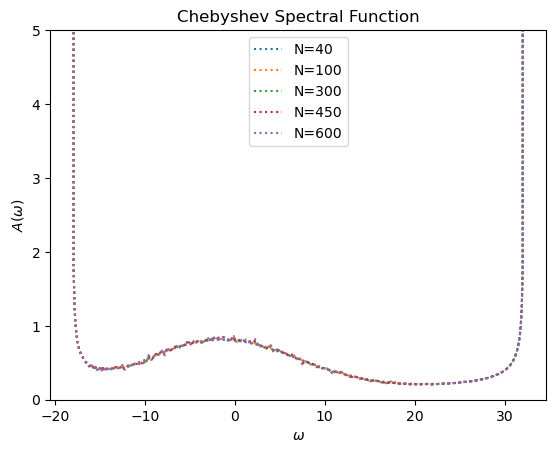

Memory: 916.73 MB


In [4]:
a,b = chebychev.energy_bounds(H1)
psi0_haar = chebychev.haar_stat(L,complex_entry=False)
N = [40,100,300,450,600]
for n in N:
    t0 = time.time()
    mu = chebychev.compute_mu(H1,O2,psi0_haar,n)

    omega_list =  np.linspace(-1 + 1e-6, 1 - 1e-6, num=500)
    gn = chebychev.jackson_kernel(n)
    A_omega = chebychev.reconstruct_spectralfunc(mu,gn,omega_list)
    omega_rescaled = a*omega_list +b 
    plt.plot(omega_rescaled,A_omega,':', label =f'N={n}')

    del mu, gn, A_omega, omega_list
    gc.collect()
    print('time=', t0-time.time())
    print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")

plt.xlabel(r'$\omega$')
plt.ylabel(r'$A(\omega)$')
plt.ylim(0,5)
plt.legend()
plt.title("Chebyshev Spectral Function")



plt.show()

print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")

### 📘 Momentum-Resolved Spectral Functions and Dynamic Structure Factor

In many-body quantum systems with translational symmetry, momentum becomes a good quantum number. This allows us to probe **momentum-resolved excitations** by constructing operators that create excitations with definite momentum $q$. This is essential for comparing to physical observables such as neutron scattering spectra or simulating spin waves.

---

#### 🧠 Why Momentum Matters

If the Hamiltonian $H$ is translationally invariant, its eigenstates can be labeled by momentum $k$, and so can the excitations. Many physical observables depend not only on the **energy** of excitations but also on their **momentum**.

One important quantity is the **spin dynamic structure factor**, defined as:

$$
S^{\alpha\alpha}(q, \omega) = \sum_n |\langle n | S^\alpha(q) | \psi_0 \rangle|^2 \, \delta(\omega - (E_n - E_0))
$$

- $|\psi_0\rangle$ is the ground state (or any initial state)
- $|n\rangle$ are the eigenstates of $H$
- $S^\alpha(q)$ is the Fourier-transformed spin operator (e.g., $S^x(q)$)

---

#### 🧮 Momentum-Resolved Operator Construction

To probe momentum $q$, define a Fourier-transformed operator from local operators $\sigma^\alpha_j$:

$$
S^\alpha(q) = \frac{1}{\sqrt{L}} \sum_{j=0}^{L-1} e^{i q j} \sigma^\alpha_j
$$

- This operator creates a superposition of local excitations with momentum $q$.
- It respects translational symmetry and selects eigenstates in that momentum sector.

---




time= -13.855307817459106
Memory: 1368.11 MB
time= -15.020171642303467
Memory: 1368.11 MB
time= -19.45203399658203
Memory: 1368.11 MB
time= -22.551835775375366
Memory: 1368.11 MB
time= -25.757956981658936
Memory: 1368.11 MB
time= -13.816203355789185
Memory: 1368.11 MB
time= -15.137935400009155
Memory: 1368.11 MB
time= -19.28191900253296
Memory: 1368.23 MB
time= -22.71402597427368
Memory: 1368.23 MB
time= -31.064005374908447
Memory: 1368.23 MB
time= -13.933948516845703
Memory: 1368.11 MB
time= -15.05944538116455
Memory: 1368.23 MB
time= -24.988518953323364
Memory: 1368.23 MB
time= -22.51561212539673
Memory: 1368.23 MB
time= -31.124240398406982
Memory: 1368.23 MB


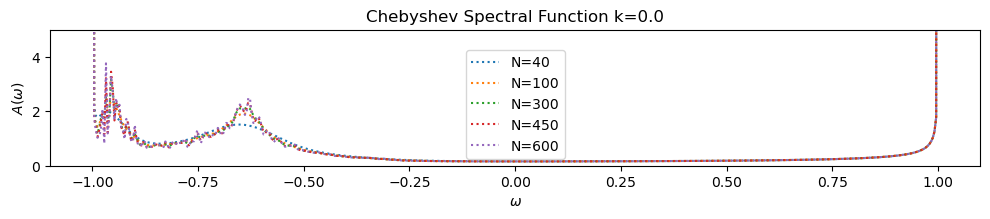

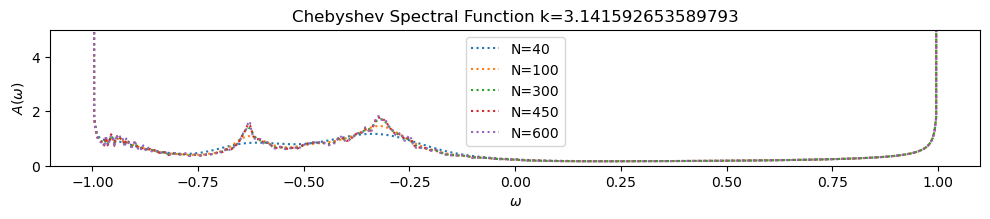

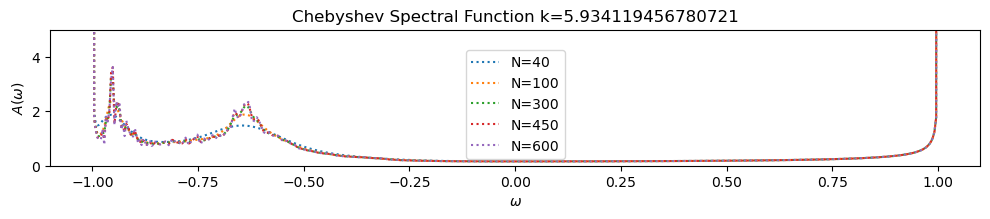

Memory: 1368.23 MB


In [15]:

k_list = lanczos.get_momentum_values(L)
k_select = [k_list[0],k_list[len(k_list)//2],k_list[-1]]
op1= lanczos.project_q_operator(L, k_list[0],lanczos.Sx)
op2= lanczos.project_q_operator(L, k_list[len(k_list)//2],lanczos.Sx)
op3= lanczos.project_q_operator(L, k_list[-1],lanczos.Sx)
Op_q = [op1,op2,op3]

N = [40,100,300,450,600]
i=0

for op in Op_q:
    plt.figure(figsize=(12,6))
    i+=1   
    for n in N:
        t0 = time.time()
        mu = chebychev.compute_mu(H1,op,psi01,n)
    
        omega_list =  np.linspace(-1 + 1e-6, 1 - 1e-6, num=500)
        gn = chebychev.jackson_kernel(n)
        A_omega = chebychev.reconstruct_spectralfunc(mu,gn,omega_list)
        plt.subplot(3,1,i)
        plt.plot(omega_list,A_omega,':', label =f'N={n}')
    
        del mu, gn, A_omega, omega_list
        gc.collect()
        print('time=', t0-time.time())
        print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")
        
    plt.xlabel(r'$\omega$')
    plt.ylabel(r'$A(\omega)$')
    plt.ylim(0,5)
    plt.legend()



    plt.title(f"Chebyshev Spectral Function k={k_select[i-1]}")



plt.show()

print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")

In [10]:
importlib.reload(lanczos)

<module 'lanczos' from '/home/n/N.Deshpande/my_folder/thesis/chebychev exp/lanczos.py'>

In [ ]:
a,b = chebychev.energy_bounds